# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [140]:
#Dependencies
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import requests
import json
import time

#key
from api_keys import weather_api_key
# Cities
from citipy import citipy
#lats-longs
rangeL=(-90,90)
rangeLG=(-180,180)
#output CSV file
output='output/cities.csv'


## Generate Cities List
#Select 500 unique cities and save the data into random_cities.csv

In [141]:
#List of cities,rondomization
coords=[]
cities=[]
ltd=np.random.uniform(rangeL[0],rangeL[1],size=2000)
lgtd=np.random.uniform(rangeLG[0],rangeLG[1],size=2000)
coords=zip(ltd,lgtd)
for coord in coords:
    Citycoords=citipy.nearest_city(coord[0],coord[1]).city_name
    if Citycoords not in cities:
        cities.append(Citycoords)
len(cities)

740

In [3]:
cities

['cidreira',
 'hami',
 'ostrovnoy',
 'norman wells',
 'dingle',
 'ust-maya',
 'hermanus',
 'busselton',
 'yellowknife',
 'atar',
 'san cristobal',
 'belushya guba',
 'tiksi',
 'kahului',
 'hobyo',
 'ushuaia',
 'dzhebariki-khaya',
 'rikitea',
 'zhigansk',
 'vaitupu',
 'clyde river',
 'college',
 'iqaluit',
 'vaini',
 'grimari',
 'kadykchan',
 'half moon bay',
 'maragogi',
 'dikson',
 'puerto ayora',
 'sorvag',
 'attawapiskat',
 'saint-philippe',
 'barentsburg',
 'katherine',
 'ende',
 'klaksvik',
 'komsomolskiy',
 'cherskiy',
 'constitucion',
 'oranjemund',
 'beringovskiy',
 'barrow',
 'taoudenni',
 'butaritari',
 'hobart',
 'chuy',
 'oussouye',
 'eureka',
 'muros',
 'zhanaozen',
 'lokoja',
 'lebu',
 'bethel',
 'sosnovo-ozerskoye',
 'bandarbeyla',
 'upernavik',
 'impfondo',
 'ribeira grande',
 'chimoio',
 'mataura',
 'falavarjan',
 'cape town',
 'gambo',
 'mar del plata',
 'bud',
 'luderitz',
 'jamestown',
 'kurilsk',
 'saskylakh',
 'road town',
 'buchanan',
 'provideniya',
 'oneonta',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [143]:
url="http://api.openweathermap.org/data/2.5/weather?"  #config data
units="imperial"
query_url=f"{url}appid={weather_api_key}&units={units}&q=" #query url for API call loop

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [144]:
counter=0
id_city=[]
city_name=[]
country=[]
latitude=[]
longitude=[]
max_temp=[]
humidity=[]
cloudiness=[]
windspeed=[]
date=[]
print('''------------------------------------------------------------------Data being retrieved
------------------------------------------------------------------''')
for city in cities:
    time.sleep(1)
    try:
       city_response=requests.get(query_url + city).json()
       id_city.append(city_response['id'])
       city_name.append(city_response['name'])
       country.append(city_response['sys']['country'])
       latitude.append(city_response['coord']['lat'])
       longitude.append(city_response['coord']['lon'])
       max_temp.append(city_response['main']['temp_max'])
       humidity.append(city_response['main']['humidity'])
       cloudiness.append(city_response['clouds']['all'])
       windspeed.append(city_response['wind']['speed'])
       date.append(city_response['dt'])
       print(f'processing {counter} | {city}')
       counter=counter+1
       
    except KeyError:
        print('city not found. next city...')

print('''------------------------------------------------------------------Data Retrieved 
------------------------------------------------------------------''')


------------------------------------------------------------------Data being retrieved
------------------------------------------------------------------
processing 0 | mayo
processing 1 | clyde river
processing 2 | albany
processing 3 | concepcion del oro
processing 4 | cape town
processing 5 | hyderabad
processing 6 | pevek
processing 7 | barrow
processing 8 | touros
processing 9 | zapolyarnyy
processing 10 | chokurdakh
processing 11 | matay
processing 12 | dondo
processing 13 | santa cruz
processing 14 | jamestown
processing 15 | bluff
processing 16 | busselton
processing 17 | mayumba
processing 18 | bredasdorp
processing 19 | goksun
processing 20 | vila franca do campo
processing 21 | mataura
processing 22 | krivosheino
processing 23 | kaitangata
processing 24 | qingdao
processing 25 | sampit
processing 26 | tuatapere
processing 27 | carnarvon
processing 28 | saskylakh
processing 29 | timizart
processing 30 | port alfred
processing 31 | bambous virieux
processing 32 | ushuaia
proce

In [145]:
#dataframe.
citydata = pd.DataFrame({'City':city_name,
                    'Country':country,
                    'Lat':latitude,
                    'Lon':longitude,
                    'Tmax':max_temp,
                    '% H':humidity,
                    'Cloudiness':cloudiness,
                    'Wind v':windspeed,
                    'Date':date})
#saving info to file.
citydata.to_csv('output/cityweather.csv')
#display df
citydata.count()

City          681
Country       681
Lat           681
Lon           681
Tmax          681
% H           681
Cloudiness    681
Wind v        681
Date          681
dtype: int64

In [146]:
citydata.head()

,City,Country,Lat,Lon,Tmax,% H,Cloudiness,Wind v,Date
0,Mayo,US,38.8876,-76.5119,46.00,100,90,3.44,1614607236
1,Clyde River,CA,70.4692,-68.5914,-14.80,64,75,24.16,1614607237
2,Albany,US,42.6001,-73.9662,39.99,86,100,6.62,1614607028
3,Concepción del Oro,MX,24.6333,-101.4167,54.14,41,23,1.50,1614607240
4,Cape Town,ZA,-33.9258,18.4232,84.20,34,40,8.05,1614607162


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [154]:
#toph=citydata.loc[citydata['% H']>90]
#toph=citydata.loc[citydata['% H']>=100]

#  Get the indices of cities that have humidity over 100%.
toph=citydata.loc[citydata['% H']>100]
toph

,City,Country,Lat,Lon,Tmax,% H,Cloudiness,Wind v,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

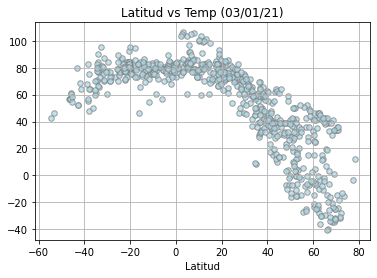

In [214]:
from datetime import date
today=date.today()
now=today.strftime("%D")

plt.scatter(citydata['Lat'],citydata['Tmax'],marker="o",facecolors="lightblue",edgecolors="grey",s=30,alpha=0.75)
plt.title(f'Latitud vs Temp ({now})')
plt.xlabel('Latitud')
plt.ylabel=(ylbl)
plt.grid()
plt.savefig('output/Lat-vs-T°.png')
plt.show()
#higher temps in southern hemisphere since its summer.

## Latitude vs. Humidity Plot

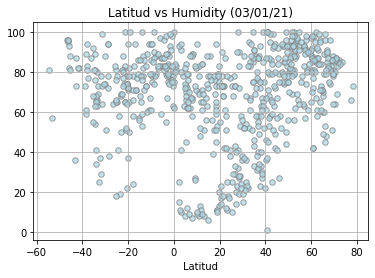

In [215]:
plt.scatter(citydata['Lat'],citydata['% H'],marker="o",facecolors="lightblue",edgecolors="grey",s=30,alpha=0.75)
plt.title(f'Latitud vs Humidity ({now})')
plt.xlabel('Latitud')
plt.ylabel=(ylbl)
plt.grid()
plt.savefig('output/Lat-vs-H.png')
plt.show()

## Latitude vs. Cloudiness Plot

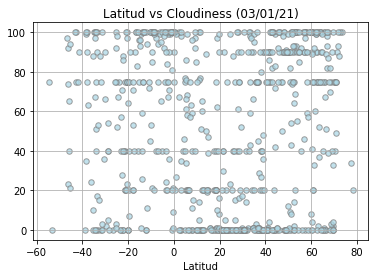

In [216]:
plt.scatter(citydata['Lat'],citydata['Cloudiness'],marker="o",facecolors="lightblue",edgecolors="grey",s=30,alpha=0.75)
plt.title(f'Latitud vs Cloudiness ({now})')
plt.xlabel('Latitud')
plt.ylabel=(ylbl)
plt.grid()
plt.savefig('output/Lat-vs-Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

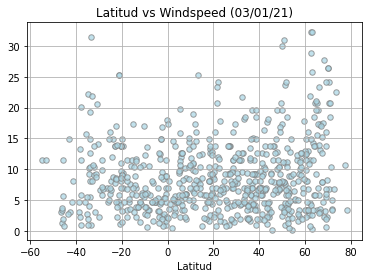

In [217]:
plt.scatter(citydata['Lat'],citydata['Wind v'],marker="o",facecolors="lightblue",edgecolors="grey",s=30,alpha=0.75)
plt.title(f'Latitud vs Windspeed ({now})')
plt.xlabel('Latitud')
plt.ylabel=(ylbl)
plt.grid()
plt.savefig('output/Lat-vs-Windspeed°.png')
plt.show()

## Linear Regression

In [240]:
def plot_LinearRegression(xdata,ydata,xlbl,ylbl,lblpos,figname):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(xdata,ydata)
    print(f'The r-sq is:{rvalue}')
    regress_values = xdata * slope + intercept
    eq = "y="+str(round(slope,2))+ "x +" + str(round(intercept))
    
    #ploting
    plt.scatter(xdata,ydata)
    plt.annotate(eq,lblpos,fontsize=13,color="orange")
    plt.plot(xdata,regress_values,"r-")
    plt.xlabel(xlbl)
    plt.ylabel=(ylbl)
    plt.savefig(f"output/{figname}.png")
    plt.show()
    return


In [222]:
sdata=citydata.loc[citydata['Lat']<0]
ndata=citydata.loc[citydata['Lat']>=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-sq is:-0.8480764149030525


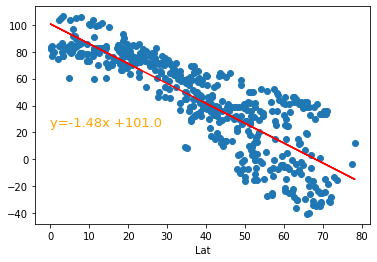

In [241]:
xlbl="Lat"
ylbl="Tmax"
lblpos=(0,25)
plot_LinearRegression(ndata[xlbl],ndata[ylbl],xlbl,ylbl,lblpos,"Lat-vs-°T-Nregress")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-sq is:0.4818542374894013


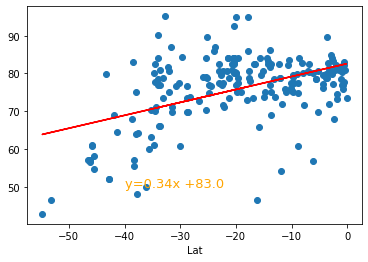

In [243]:
xlbl="Lat"
ylbl="Tmax"
lblpos=(-40,50)
plot_LinearRegression(sdata[xlbl],sdata[ylbl],xlbl,ylbl,lblpos,"Lat-vs-°T-Sregress")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-sq is:0.3894474890548345


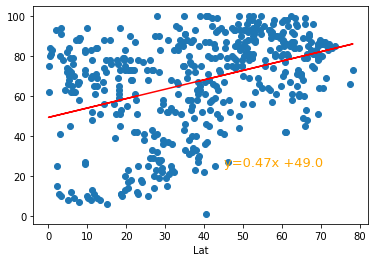

In [245]:
xlbl="Lat"
ylbl="% H"
lblpos=(45,25)
plot_LinearRegression(ndata[xlbl],ndata[ylbl],xlbl,ylbl,lblpos,"Lat-vs-%H-Nregress")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-sq is:0.18677113836272236


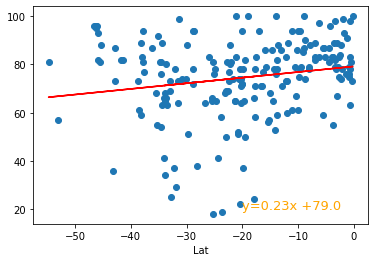

In [246]:
xlbl="Lat"
ylbl="% H"
lblpos=(-20,20)
plot_LinearRegression(sdata[xlbl],sdata[ylbl],xlbl,ylbl,lblpos,"Lat-vs-%H-Sregress")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-sq is:0.27973896597238124


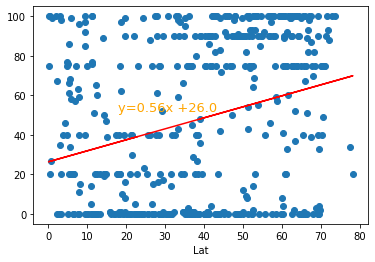

In [247]:
xlbl="Lat"
ylbl="Cloudiness"
lblpos=(18,52)
plot_LinearRegression(ndata[xlbl],ndata[ylbl],xlbl,ylbl,lblpos,"Lat-vs-Cloudiness-Nregress")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-sq is:0.1546568326356656


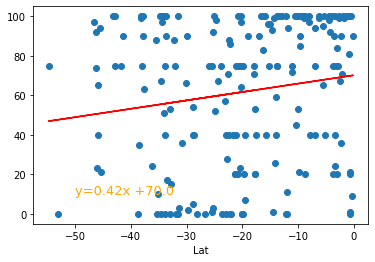

In [248]:
xlbl="Lat"
ylbl="Cloudiness"
lblpos=(-50,10)
plot_LinearRegression(sdata[xlbl],sdata[ylbl],xlbl,ylbl,lblpos,"Lat-vs-Cloudiness-Sregress")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-sq is:0.16645837957546344


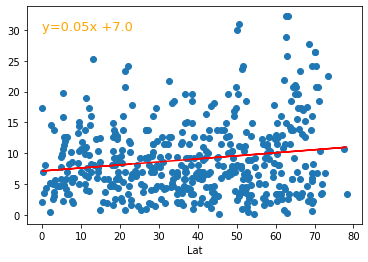

In [249]:
xlbl="Lat"
ylbl="Wind v"
lblpos=(0,30)
plot_LinearRegression(ndata[xlbl],ndata[ylbl],xlbl,ylbl,lblpos,"Lat-vs-WindV-Nregress")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-sq is:-0.12884404170981278


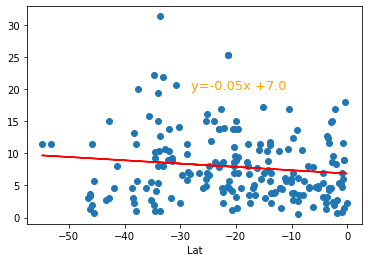

In [250]:
xlbl="Lat"
ylbl="Wind v"
lblpos=(-28,20)
plot_LinearRegression(sdata[xlbl],sdata[ylbl],xlbl,ylbl,lblpos,"Lat-vs-WindV-Sregress")
